In [36]:
from google.colab import drive
drive.mount("/content/gdrive/")

import pandas as pd

path = "gdrive/My Drive/Colab Notebooks/EAAI21/"

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [37]:
df = pd.read_csv(path+"data_1.csv")
df = df.loc[df['XV'] > 0]
game_end = df.loc[df['Terminated'] == 0]
game_not_end = df.loc[df['Terminated'] == 1]

(array([ 8772.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 11182.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

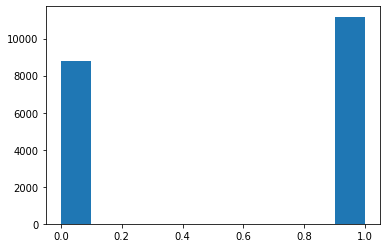

In [38]:
import matplotlib.pyplot as plt
plt.hist(df['Terminated'])

(array([6882.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1890.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

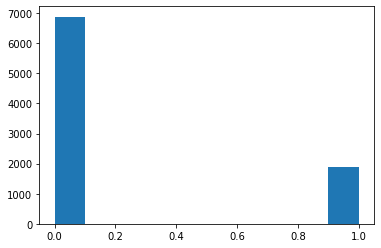

In [39]:
plt.hist(game_end['Win'])

# Condition for the game not end after 500000

In [40]:
game_not_end.drop(columns='Win', inplace=True)
y_terminated = game_not_end.pop('Terminated')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [41]:
import statsmodels.api as sm
game_not_end = sm.add_constant(game_not_end, prepend=False)
mod = sm.OLS(y_terminated, game_not_end)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             Terminated   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -5590.
Date:                Thu, 05 Aug 2021   Prob (F-statistic):               1.00
Time:                        09:11:49   Log-Likelihood:             3.9910e+05
No. Observations:               11182   AIC:                        -7.982e+05
Df Residuals:                   11179   BIC:                        -7.982e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
XG             0.2500   2.37e-18   1.05e+17      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


# Condition for the game end after 500000

In [42]:
game_end.drop(columns='Terminated', inplace=True)
y_win = game_end.pop('Win')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [43]:
import statsmodels.api as sm
game_end = sm.add_constant(game_end, prepend=False)
mod = sm.OLS(y_win, game_end)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    Win   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     728.6
Date:                Thu, 05 Aug 2021   Prob (F-statistic):          1.82e-293
Time:                        09:11:49   Log-Likelihood:                -3975.9
No. Observations:                8772   AIC:                             7958.
Df Residuals:                    8769   BIC:                             7979.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
XG            -0.4286      0.016    -26.768      0.0

# Logistic regression

In [44]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
X_train, X_test, y_train, y_test =  train_test_split(game_end, y_win, test_size=0.3, shuffle=True, random_state=1)
log_reg = sm.Logit(y_train, X_train)
res = log_reg.fit()
y_pred = res.predict(X_test)
print(res.summary())
# print(y_pred/y_test * 100)

Optimization terminated successfully.
         Current function value: 0.398175
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                    Win   No. Observations:                 6140
Model:                          Logit   Df Residuals:                     6137
Method:                           MLE   Df Model:                            2
Date:                Thu, 05 Aug 2021   Pseudo R-squ.:                  0.2325
Time:                        09:11:49   Log-Likelihood:                -2444.8
converged:                       True   LL-Null:                       -3185.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
XG           -10.3433        nan        nan        nan         nan         nan
XD             2.0864        

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


In [49]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
clf = logit.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(y_pred)

[0 1 0 ... 0 0 0]


In [55]:
import numpy as np

np.abs(np.sum(y_pred - np.array(y_test)))/len(y_pred) * 100

13.563829787234042

In [45]:
import statsmodels.api as sm
log_reg = sm.Logit(y_win, game_end).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.405122
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                    Win   No. Observations:                 8772
Model:                          Logit   Df Residuals:                     8769
Method:                           MLE   Df Model:                            2
Date:                Thu, 05 Aug 2021   Pseudo R-squ.:                  0.2226
Time:                        09:11:49   Log-Likelihood:                -3553.7
converged:                       True   LL-Null:                       -4571.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
XG           -10.1259   2.87e+06  -3.53e-06      1.000   -5.62e+06    5.62e+06
XD             2.0722   2.87

In [ ]:
import statsmodels.api as sm
log_reg = sm.Logit(y_terminated, game_not_end).fit()
# Perfect separation
print(log_reg.summary())